***1.3.1 Задание***
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

***Решение***

3.7416573867739413
1.0
1.4142135623730951
3.0
4.242640687119285
1.7320508075688772


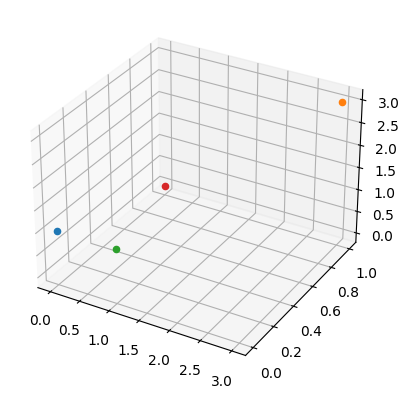

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = np.array([0,0,1])
b = np.array([3,1,3])
c = np.array([1,0,1])
d = np.array([0,1,0])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

points = [a, b, c, d]

for i in points:
    ax.scatter(*i)

print(np.linalg.norm(a-b))
print(np.linalg.norm(a-c))
print(np.linalg.norm(a-d))
print(np.linalg.norm(b-c))
print(np.linalg.norm(b-d))
print(np.linalg.norm(c-d))

plt.show()

In [11]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 285.1/285.1 kB 274.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


***2.3.1 Задание***
Для предыдущего примера поэкспериментируйте с параметрами классификатора:

Установите другое количество ближайших соседей (k = 1, 5, 10).

Установите размер тестовой выборки 15% от всего датасета.

Постройте графики и оцените качество моделей, проанализируйте результаты.

***Решение***

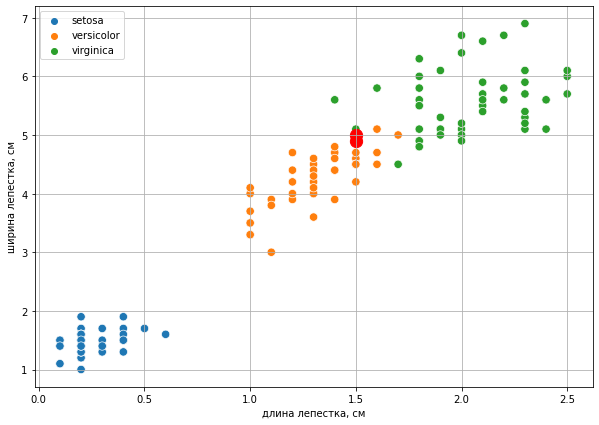

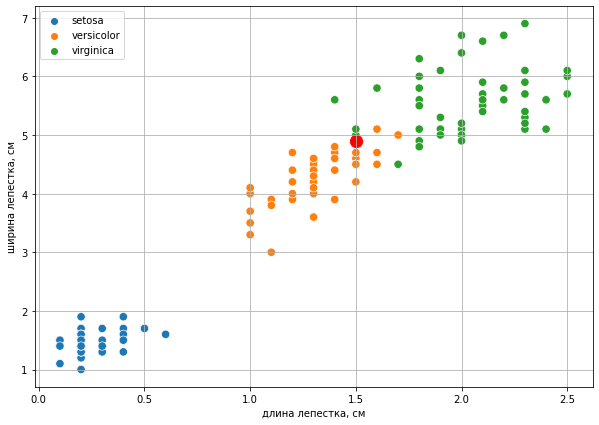

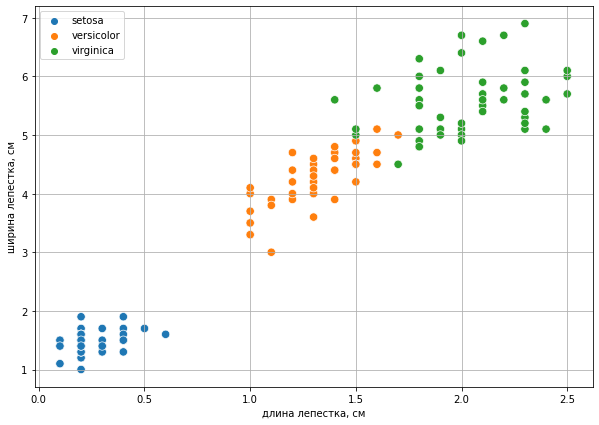

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    # поскольку Iris - pandas-таблица, для нее нужно указывать iloc
    iris.iloc[:,:-1],   # берем все колонки кроме последней в признаки
    iris.iloc[:,-1],    # последнюю в целевую переменную (класс)
    test_size = 0.15    # размер тестовой выборки 20%
)

model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(X_train, y_train)
model_5 = KNeighborsClassifier(n_neighbors=5)
model_5.fit(X_train, y_train)
model_10 = KNeighborsClassifier(n_neighbors=10)
model_10.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_5 = model_5.predict(X_test)
y_pred_10 = model_10.predict(X_test)

plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('длина лепестка, см')
plt.ylabel('ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

# перебираем все объекты из теста
for i in range(len(y_test)):
    # если предсказание неправильное
    if np.array(y_test)[i] != y_pred_1[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('длина лепестка, см')
plt.ylabel('ширина лепестка, см')
plt.legend(loc=2)
plt.grid()        
        
for i in range(len(y_test)):
    # если предсказание неправильное
    if np.array(y_test)[i] != y_pred_5[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('длина лепестка, см')
plt.ylabel('ширина лепестка, см')
plt.legend(loc=2)
plt.grid()        

for i in range(len(y_test)):
    # если предсказание неправильное
    if np.array(y_test)[i] != y_pred_10[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

***3.3.2 Задание***

Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

***Решение***

In [4]:
from sklearn.feature_extraction import DictVectorizer
# Создать словарь
data_dict = [{'глаза': 11, 'рот': 4},
             {'душа': 4, 'глаза': 3},
             {'душа': 2, 'ноги': 2},
             {'душа': 2, 'глаза': 4}]
# Создать векторизатор словаря
dictectorizer = DictVectorizer(sparse=False)
# Конвертировать словарь в матрицу признаков
features = dictectorizer.fit_transform(data_dict)
features


array([[11.,  0.,  0.,  4.],
       [ 3.,  4.,  0.,  0.],
       [ 0.,  2.,  2.,  0.],
       [ 4.,  2.,  0.,  0.]])